### Imports

In [48]:
%load_ext autoreload
%autoreload 2

import numpy as np

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from data_management import data_loading, random_sampling, joint_random_sampling
from plotting import color_plot, plot3d_dataset, plot_target_classes
from model_evaluation import evaluate_classifiers, evaluation_pipeline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Data loading

In [27]:
manip_features = data_loading('cwt', 0.75)

### Select Manipulation Category

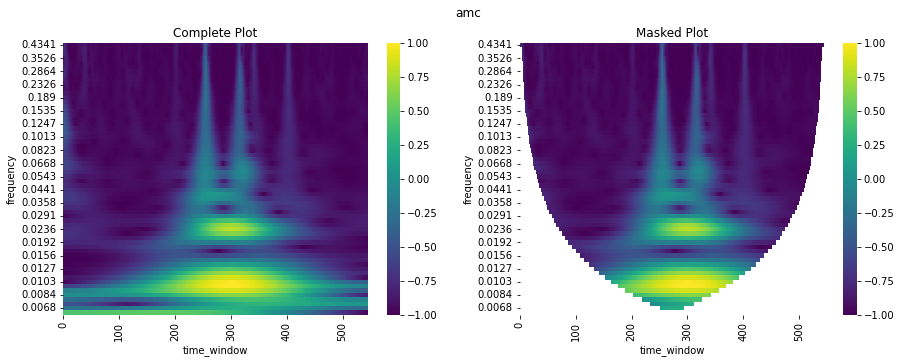

In [28]:
manip_category = 'pump_and_dump'
stock = 'amc'

stock_features = manip_features[manip_category][stock]
feature_matrix = stock_features['feature_matrix']
color_plot(feature_matrix, 4, 5, stock)

In [29]:
plot_against = 'modulus'

plot3d_dataset(feature_matrix, '3D Plot Complete Dataset', plot_against, target_var=feature_matrix[:, -1])

### Random Sampling and Splitting

In [58]:
X_train_all, y_train, X_val_all, y_val, X_test_all, y_test = random_sampling(feature_matrix, 0.6, 0.5, 'normal')

# Characteristics filtering
X_train = X_train_all[:, [0, 1, 2]]
X_test = X_test_all[:, [0, 1, 2]]

X_val = X_val_all[:, [0, 1, 2]]
X_test = X_test_all[:, [0, 1, 2]]

### Distribution Visualization

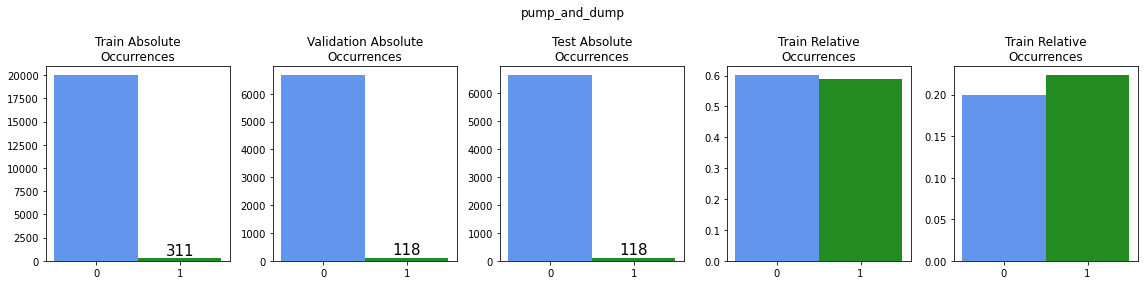

In [35]:
plot_target_classes(y_train, y_val, y_test, manip_category)

In [42]:
plot_against = 'modulus'

plot3d_dataset(X_train_all, '3D Plot Test Dataset', plot_against, target_var=y_train)

### Model Benchmarking

In [61]:
gen_error = 0.01
train_error = 0.01
sampling_mode = 'independent'

classifiers_errors = evaluation_pipeline(feature_matrix, 'decision_tree', gen_error, train_error, sampling_mode, depth=3)

Required samples: 111794, available samples: 33790.
Not enough samples available, will return standard 60%.
20274 of the data are used for training.
6758 of the data are used for validation.
6758 of the data are used for testing.
decision_tree
Label One: train error: 0.5446153846153846, val error: 0.6288659793814433, test error: 0.5700934579439252
Label Zero: train error: 0.00010025565191240648, val error: 0.0, test error: 0.0


In [38]:
classifiers_dict = {
    'decision_tree': DecisionTreeClassifier(max_depth=3),
    'svm_linear': SVC(kernel='linear', C=1.0),
    'svm_poly': SVC(kernel='poly', C=1.0, degree=30),
    'svm_rbf': SVC(kernel='rbf', C=1.0),
    'logistic_regression': LogisticRegression(solver='lbfgs', C=1.0)
}

classifiers_errors = evaluate_classifiers(classifiers_dict, X_train, y_train, X_val, y_val, X_test, y_test)

decision_tree
Label One: train error: 0.54983922829582, val error: 0.61, test error: 0.5593220338983051
Label Zero: train error: 5.0092671442181214e-05, val error: 0.00015019525382997667, test error: 0.0001506024096386005
svm_linear
Label One: train error: 1.0, val error: 1.0, test error: 1.0
Label Zero: train error: 0.0, val error: 0.0, test error: 0.0
svm_poly
Label One: train error: 1.0, val error: 1.0, test error: 1.0
Label Zero: train error: 0.0, val error: 0.0, test error: 0.0
svm_rbf
Label One: train error: 1.0, val error: 1.0, test error: 1.0
Label Zero: train error: 0.0, val error: 0.0, test error: 0.0
logistic_regression
Label One: train error: 1.0, val error: 1.0, test error: 1.0
Label Zero: train error: 0.0, val error: 0.0, test error: 0.0
